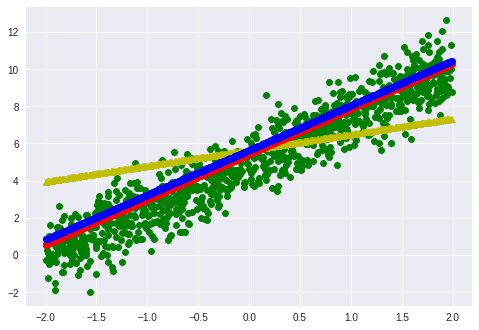

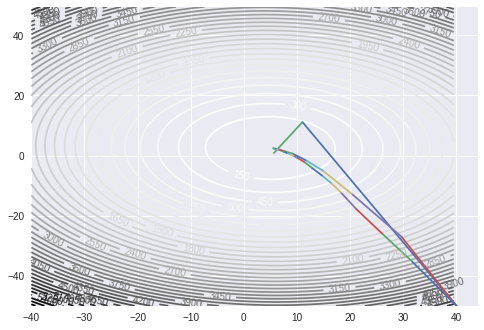

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize


# Data
lenT = 1000
a0=5
b1=2.5

x1=-2+4*np.random.rand(lenT)
y=np.zeros(lenT)
for j in range(lenT):
    y[j] = a0 + b1*x1[j] + np.random.normal(0,1)

plt.figure(1) 
plt.plot(x1,y,'go')



def gradient(params, Y, X1):
    n=len(y)
    a0 = params[0]
    b1 = params[1]
    return np.array([-2.0*sum((Y - a0 - b1*X1))/n, -2.0*sum((Y - a0 - b1*X1)*X1)/n])


a =np.arange(-40, 40, 0.5)
len1 = a.size
b =np.arange(-50, 50, 0.5)
len2 = b.size

s = np.zeros((len2,len1), np.float64)

for i in range(len1):
    for j in range(len2):
        s[j,i] = sum((y-a[i]-b[j]*x1)**2)/lenT

#subplot(1,2,1);

# Basic contour plot

fig, ax = plt.subplots()
CS = ax.contour(a, b, s, 40)
fmt = '%1.0f'

ax.clabel(CS, inline=1, fmt=fmt,fontsize=10)


nIters=2

# (Batch) Gradient Descent

x_i = [40, -50]

g1 = 0.43

for i in range (nIters):
    x_pre = x_i
    x_i = x_i - g1 * gradient(x_i, y, x1)
    ax.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])

a0 = x_i[0]
b1 = x_i[1]
plt.figure(1)
plt.plot(x1, a0+b1*x1, 'y^')

#plt.show()

# Mini-Batch Gradient Descent

x_i = [40, -50]

g1 = 0.9
batchSize=200
numofBatches=math.ceil(lenT/batchSize)

for i in range (nIters):
    for j in range(numofBatches):
        start=j*batchSize
        finish=min((j+1)*batchSize, lenT)
        x_pre = x_i
        x_i = x_i - g1 * gradient(x_i, y[start:finish], x1[start:finish])
        ax.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])

a0 = x_i[0]
b1 = x_i[1]

plt.figure(1)
plt.plot(x1, a0+b1*x1, 'ro')
#plt.show()


# Stochastic Gradient Descent

x_i = [40, -50]

g1 = 0.9


#for i in range (nIters):
#    for j in range(lenT):
#        print('i={}, j={}'.format(i, j))
#        x_pre = x_i
#        x_i = x_i - g1 * gradient(x_i, y[0:j], x1[0:j])
#        plt.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])


numofSamples=10
for i in range (nIters):
    for j in range(numofSamples):
        sample=100
        idx = np.random.choice(lenT, size=sample, replace=False)
        xsub=[]
        ysub=[]
        for n in idx:
            xsub.append(x1[n])
            ysub.append(y[n])
        x_pre = x_i
        x_i = x_i - g1 * gradient(x_i, np.array(ysub), np.array(xsub))
        ax.plot([x_pre[0],x_i[0]], [x_pre[1],x_i[1]])


a0 = x_i[0]
b1 = x_i[1]

plt.figure(1) 
plt.plot(x1, a0+b1*x1, 'bo')
plt.show()
